In [1]:
from sklearn import preprocessing
import pandas as pd
from matplotlib import pyplot as plt
import keras
from keras import layers
import numpy as np
from matplotlib.ticker import ScalarFormatter
import tensorflow as tf
import pydot

In [17]:
d = np.array([78,100,98,46,86,72])
c = np.array([0.78,1,0.99,0.6,0.87,0.72])

In [18]:
d_norm = preprocessing.minmax_scale(d)
c_norm = preprocessing.minmax_scale(c)

In [19]:
d_norm

array([0.59259259, 1.        , 0.96296296, 0.        , 0.74074074,
       0.48148148])

In [20]:
c_norm

array([0.45 , 1.   , 0.975, 0.   , 0.675, 0.3  ])

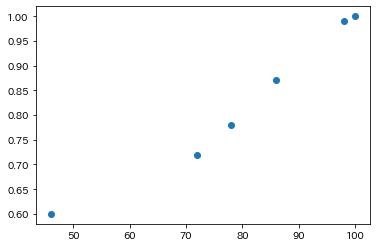

In [21]:
plt.scatter(d,c)

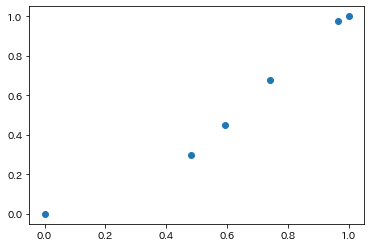

In [22]:
plt.scatter(d_norm, c_norm)

In [39]:
from sklearn.preprocessing import StandardScaler
import math

In [53]:
d = np.array([78,100,98,46,86,72])
d_r = d.reshape(-1,1)
# c = np.array([0.78,1,0.99,0.6,0.87,0.72])
c = np.array([12,55,69,100,120,66])
c_r = c.reshape(-1,1)

In [36]:
scaler = StandardScaler()
scaler.fit(d_r)

StandardScaler()

In [42]:
print(scaler.mean_) 
print(scaler.var_)
print(math.sqrt(scaler.var_))
a = scaler.transform(d_r)

[80.]
[330.66666667]
18.184242262647807


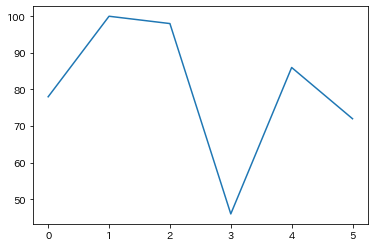

In [57]:
plt.plot(d_r)

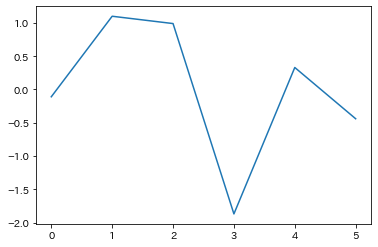

In [58]:
plt.plot(a)

In [54]:
test_data = (np.array(c) - scaler.mean_) - np.sqrt(scaler.var_)

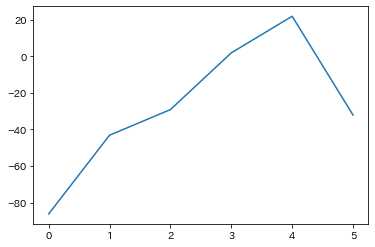

In [55]:
plt.plot(test_data)

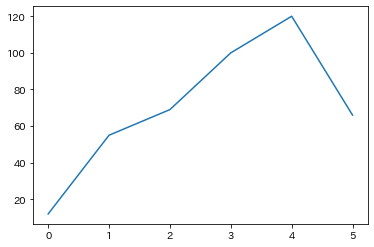

In [56]:
plt.plot(c)

In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#正規化のクラスを生成
mmsc=MinMaxScaler()
#標準化のクラスを生成
stdsc = StandardScaler()

In [62]:
train_x = np.array([1,2,3,4,5,6])
train_x = train_x.reshape(-1,1)
test_x = np.array([0.1,0.2,0.3,0.4,0.5,0.6])
test_x = test_x.reshape(-1,1)

In [67]:
train_std = stdsc.fit_transform(train_x)
print(stdsc.mean_) 
print(stdsc.var_)
print(math.sqrt(stdsc.var_))

[3.5]
[2.91666667]
1.707825127659933


In [68]:
test_std = (test_x - stdsc.mean_) / np.sqrt(stdsc.var_)
test_std

array([[-1.99083615],
       [-1.93228214],
       [-1.87372814],
       [-1.81517414],
       [-1.75662013],
       [-1.69806613]])

In [63]:
#訓練用のデータを正規化
train_mm = mmsc.fit_transform(train_x)
#訓練用のデータを標準化
train_std = stdsc.fit_transform(train_x)
 
#訓練用データを基にテストデータを正規化
test_mm=mmsc.transform(test_x)
#訓練用データを基にテストデータを標準化
test_std = stdsc.transform(test_x)

In [64]:
train_std

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

In [65]:
test_std

array([[-1.99083615],
       [-1.93228214],
       [-1.87372814],
       [-1.81517414],
       [-1.75662013],
       [-1.69806613]])

# make test data(1path内の1200回転分のfftを作るとどのくらい時間かかるか見る）

- 0113 + 0117 [:9970000 * 3]
- 0120 [36000 * 3:10006000 * 3]
- 0123 [1000000 * 3 :9500000 * 3]

In [80]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [74]:
%matplotlib qt
num = 3
path = rf"Z:\100 Raw_data\20230113---切削実験\AE\Cutting\AE_{num}.tdms"
ae = load_tdms(path, ch_num=3)
plt.plot(ae[1])
# Z:\100 Raw_data\20230113---切削実験\AE\Cutting

In [75]:
dt = 1/10**6
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
y_label = "amplitude"
y_unit = "V"

In [77]:
date = 20230113

In [78]:
def get_tdms(num):
    load_path = rf"Z:\100 Raw_data\{date}---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    return d[1]
#     return d[1][36000*3:]
#     return d[1][1000000*3:]

In [95]:
%%time
for i in tqdm(range(,4)):
    d = get_tdms(i)
    fft_amp = np.array([])
    
    for j in range(0,1200):
        sample_num = 2**14
        start = j * 25000
        end = start + sample_num

        ds = d[start:end]
        
        N = len(ds)
        fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
        
        fq_, amp_ = FFT_main(fq, ds, dt, split_t_r, overlap, window_F)
        amp_ = 20*np.log10(amp_)
        amp_ = amp_[int(len(amp_)/10) * 4 : int(len(amp_)/10 * 6)]
    
        fft_amp = np.append(fft_amp, amp_)
        
    np.save(rf"Z:\200 Produced_data\20230113+0117\train_data\{i}",fft_amp)

#     np.save(rf"Z:\200 Produced_data\{date}\AE\menseki\50khz\{i}", np.array(mensekis))

100%|██████████| 1/1 [00:10<00:00, 10.29s/it]

Wall time: 10.3 s


In [102]:
%%time
for i in tqdm(range(4,5)):
    d = get_tdms(i)
#     fft_amp = np.array([])
    
    for j in range(0,1200):
        sample_num = 2**14
        start = j * 25000
        end = start + sample_num

        ds = d[start:end]
        
        N = len(ds)
        fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
        
        fq_, amp_ = FFT_main(fq, ds, dt, split_t_r, overlap, window_F)
        amp_ = 20*np.log10(amp_)
        amp_ = amp_[int(len(amp_)/10) * 4 : int(len(amp_)/10 * 6)]
#         np.save(rf"Z:\200 Produced_data\20230113+0117\train_data\{i}_{j}",amp_)

100%|██████████| 1/1 [00:29<00:00, 29.90s/it]

Wall time: 29.9 s


In [97]:
d = np.load(rf"Z:\200 Produced_data\20230113+0117\train_data\3.npy")

In [100]:
len(d)/1200

164.0

In [99]:
len(amp_)/1200

0.13666666666666666

# make train/test data(未分類）